---
<a name = Section1></a>
---
# **1. Introduction**
---

- For many of us, **Entertainment** is a **major part** of our **lives** where we spend much of our free time to **relax** and **chill**. 

- Having a reasonable **time-off** to relax can be **good** for your mental health and general wellbeing.


- Watching movies is one of the simplest form of entertainment and it is something we all have. 

- When we enjoy a good movie, we get lost in a movie and  get a break from the everyday stressful life.




---
# **2. Problem Statement**
---

- Every Industry has its ups & downs. And it applies same for the Film Industry.
- Movies are here for more than **100 years** and there may not be an end to the Industry as it has became a common point of entertainment for many poeple irrespective of demographics.
- After all these years, is there any secret formula for movie making in order to generate more Revenue ?

** ** 

- Ofcourse, the Industry may be a means of entertainment for other people, but the artists and the people investing in the industry need to make a living and every tide makes its mark.
- Lets have a look at what we can do with our data and see if we could draw any actionable **insights** to the film makers?

---
# **3. Importing Libraries**
---

In [219]:
import pandas as pd                                                 # Importing for panel data analysis
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
from collections import Counter                                     # For counting hashable objects
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import plotly.graph_objs as go                                      # For Plotly interfaced graphs
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing numpy for n-D array operations

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

- This dataset is obtained from the dataset collection curated by **INSAID**.

- This is a dataset of 1,000 most popular movies on IMDB in the decade of **2006** to **2016**.

| Records | Features | 
| :-- | :-- 
| 1000 | 12 |

| Id | Features | Description |
| :-- | :--| :--| 
|01|**Rank**|Movie rank order.|
|02|**Title**|The title of the film.| 
|03|**Genre**|A comma-separated list of genres used to classify the film.|
|04|**Description**|Brief one-sentence movie summary.|
|05|**Director**|The name of the film's director.|
|06|**Actors**|A comma-separated list of the main stars of the film.|
|07|**Year**|The year in which the film released as an integer.|
|08|**Runtime (Minutes)**|The duration of the film in minutes.|
|09|**Rating**|User rating for the movie 0-10|
|10|**Votes**|Number of votes|
|11|**Revenue (Millions)**|Movie Revenue in millions|
|12|**Metascore**|An aggregated average of critic scores. Values are between 0 and 100. Higher scores represent positive reviews.|


In [3]:
data = pd.read_csv(filepath_or_buffer='https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/1000%20movies%20data.csv')
print('Data Shape:', data.shape)
data.head()

Data Shape: (1000, 12)


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced to work together to stop a fanatical warrior from taking control of the universe.,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe Saldana",2014,121,8.10000,757074,333.13000,76.00000
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a team finds a structure on a distant moon, but they soon realize they are not alone.",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fassbender, Charlize Theron",2012,124,7.00000,485820,126.46000,65.00000
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diagnosed 23 distinct personalities. They must try to escape before the apparent emergence of a frightful new 24th.,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richardson, Jessica Sula",2016,117,7.30000,157606,138.12000,62.00000
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling theater impresario's attempt to save his theater with a singing competition becomes grander than he anticipates even as its finalists' find that their lives will never be the same.",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth MacFarlane, Scarlett Johansson",2016,108,7.20000,60545,270.32000,59.00000
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of the most dangerous incarcerated super-villains to form a defensive task force. Their first mission: save the world from the apocalypse.,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola Davis",2016,123,6.20000,393727,325.02000,40.00000


### **4.1 Data Description**

- In this section we will get **information about the data** and see some observations.

In [222]:
data.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,838.00000,838.00000,838.00000,838.00000,838.00000,838.00000,838.00000
mean,485.24702,2012.50716,114.63842,6.81432,193230.25179,84.56456,59.57518
std,286.57206,3.17236,18.47092,0.87775,193099.00510,104.52023,16.95242
min,1.00000,2006.00000,66.00000,1.90000,178.00000,0.00000,11.00000
25%,238.25000,2010.00000,101.00000,6.30000,61276.50000,13.96750,47.00000
50%,475.50000,2013.00000,112.00000,6.90000,136879.50000,48.15000,60.00000
75%,729.75000,2015.00000,124.00000,7.50000,271083.00000,116.80000,72.00000
max,1000.00000,2016.00000,187.00000,9.00000,1791916.00000,936.63000,100.00000


- **1.** The average runtime of a movie is found to be **113.17 min** or **1 hr 53 min**.
- **2.** The average votes recieved per movie is found to be **169808.25** votes.
- **3.** The Highest grossing movie earned **936.63 million** dollars in revenue.


### **4.2 Data Information**

- In this section we will see the **information about the types of features**.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


- We can observe that there are missing values in our data, specifically in **Revenue** & **Metascore** columns.
- From the data, we have 
- **3** columns of **float64**  datatype,
- **4** columns of **int64** datatype,
- **5** columns of **object** datatype.


---
# **5. Data Pre-Profilling**
---

<a name = Section51></a>
###  Pre Profiling Report

- For **quick analysis** pandas profiling is very handy.



In [295]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df = data)
profile.to_file(output_file = 'Pre Profiling Report.html')
print('Accomplished!')

Summarize dataset:   0%|          | 0/5 [00:01<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


**Observations:**

- There are **13 features** with **1000 observations** in the dataset.

- **192 (19.2%) cells** have **missing** values.

- Most of the missing values are from the **Revenue (Millions)** feature and the rest belong to the **Metascore** feature.

- **Revenue (Millions)** and **Metascore** are highly **correlated** to each other.

- **Metascore** and **Rating** are also highly **correlated** to each other.



---
# **6. Data Pre-Processing**
---

<a name = Section51></a>
###  Handling of Missing Data

- In this section, we will identify missing data and check the proportion of it and take appropriate measures.

In [225]:
null_frame = pd.DataFrame(index = data.columns.values)
null_frame['Null Frequency'] = data.isnull().sum().values
null_percent = data.isnull().sum().values / data.shape[0]
null_frame['Missing %'] = np.round(null_percent, decimals = 4)*100
null_frame.transpose()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Null Frequency,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
Missing %,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


**Observations:**

- We can observe that following features are found to have missing values along with the proportions:

|Feature|Object Type|Missing Proportion|Solution|
|:--:|:--:|:--:|:--|
|Revenue (Millions)|Float64|12.8%|Drop the missing entries.|
|Metascore|Float64|6.4%|Drop the missing entries.|

**Performing Operations**

In [164]:
data.dropna(axis=0, how='any', subset=('Revenue (Millions)', 'Metascore'), inplace=True)
data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced to work together to stop a fanatical warrior from taking control of the universe.,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe Saldana",2014,121,8.10000,757074,333.13000,76.00000
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a team finds a structure on a distant moon, but they soon realize they are not alone.",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fassbender, Charlize Theron",2012,124,7.00000,485820,126.46000,65.00000
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diagnosed 23 distinct personalities. They must try to escape before the apparent emergence of a frightful new 24th.,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richardson, Jessica Sula",2016,117,7.30000,157606,138.12000,62.00000
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling theater impresario's attempt to save his theater with a singing competition becomes grander than he anticipates even as its finalists' find that their lives will never be the same.",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth MacFarlane, Scarlett Johansson",2016,108,7.20000,60545,270.32000,59.00000
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of the most dangerous incarcerated super-villains to form a defensive task force. Their first mission: save the world from the apocalypse.,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola Davis",2016,123,6.20000,393727,325.02000,40.00000


In [223]:
data.isnull().sum()

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64

- Let's verify the integrity of null values again.

In [165]:
null_frame = pd.DataFrame(index = data.columns.values)
null_frame['Null Frequency'] = data.isnull().sum().values
null_percent = data.isnull().sum().values / data.shape[0]
null_frame['Missing %'] = np.round(null_percent, decimals = 4)*100
null_frame.transpose()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Null Frequency,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
Missing %,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


---
# **7. Data Post-Profiling**
---

- In this section, we will observe the changes after performing data pre-processing, if present.

In [257]:
profile = ProfileReport(df = data)
profile.to_file(output_file = 'Post Profiling Report.html')
print('Accomplished!')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


**Observations**:

- There are **no missing values** in the dataset.

- **Description** feature shows **high cardinality**.


---
# **8. Exploratory Data Analysis**
---

In [166]:
data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced to work together to stop a fanatical warrior from taking control of the universe.,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe Saldana",2014,121,8.10000,757074,333.13000,76.00000
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a team finds a structure on a distant moon, but they soon realize they are not alone.",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fassbender, Charlize Theron",2012,124,7.00000,485820,126.46000,65.00000
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diagnosed 23 distinct personalities. They must try to escape before the apparent emergence of a frightful new 24th.,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richardson, Jessica Sula",2016,117,7.30000,157606,138.12000,62.00000
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling theater impresario's attempt to save his theater with a singing competition becomes grander than he anticipates even as its finalists' find that their lives will never be the same.",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth MacFarlane, Scarlett Johansson",2016,108,7.20000,60545,270.32000,59.00000
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of the most dangerous incarcerated super-villains to form a defensive task force. Their first mission: save the world from the apocalypse.,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola Davis",2016,123,6.20000,393727,325.02000,40.00000


**Q** What is the trend of movies released along the years and at what frequency ?

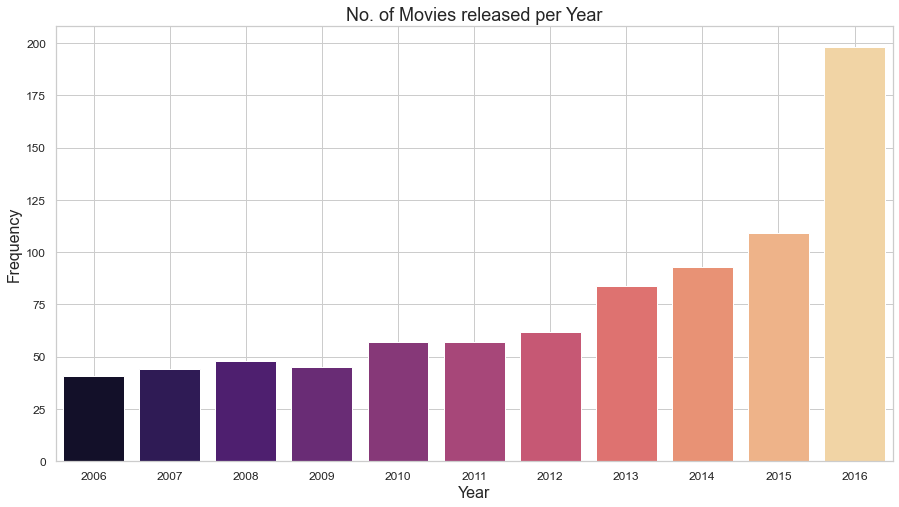

In [286]:
fig = plt.figure(figsize=(15,8))                                          

sns.countplot(x='Year', data=data, palette = 'magma')                                         

plt.title(label='No. of Movies released per Year', size=18)
plt.xlabel(xlabel='Year', size=16)
plt.ylabel(ylabel='Frequency', size=16)
plt.xticks(size=12)
plt.yticks(size=12)
plt.grid(b=True)

plt.show()

**Observations:**

- The no. of movies released in a year kept on increased with time.
- There is gradual increase of movies released from **2006** to **2015**.
- We can also find the there is a drastical increase of movies released in the year **2016** from **2015**.

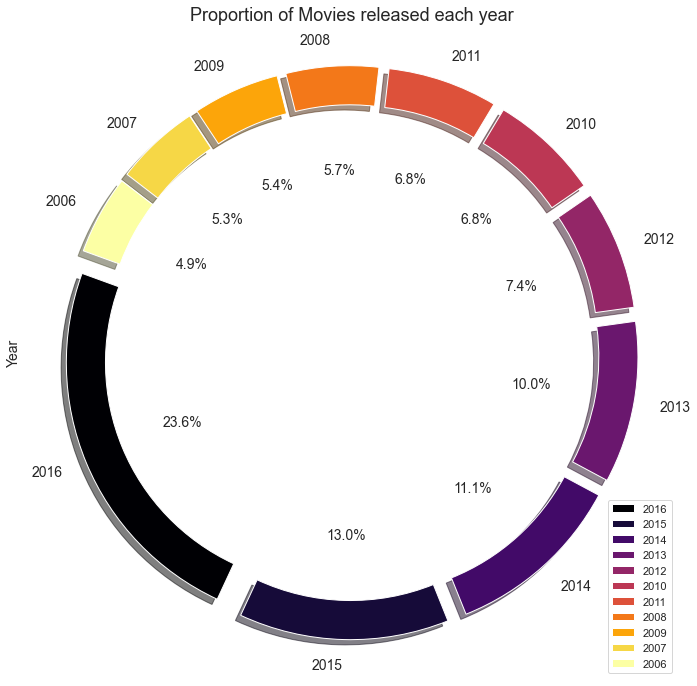

In [195]:
figure = plt.figure(figsize=[15, 12])

space = np.ones(11)/10

data['Year'].value_counts().plot(kind='pie', explode=space, fontsize=14, 
                                       autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                       shadow=True, startangle=160, cmap='inferno', legend=True)

plt.ylabel(ylabel='Year', size=14)
plt.title(label='Proportion of Movies released each year', size=18)
plt.show()

**Observations:**

- We can see that there is a drastical increase of **18.7%** movies from 2006 to 2016, A decade made a lot of progress to the Film Industry.
- We can also find the there is a drastical increase of **10.6%** movies released in the year **2016** from **2015**.

**Q** Which year experienced the highest Revenue through movies ?

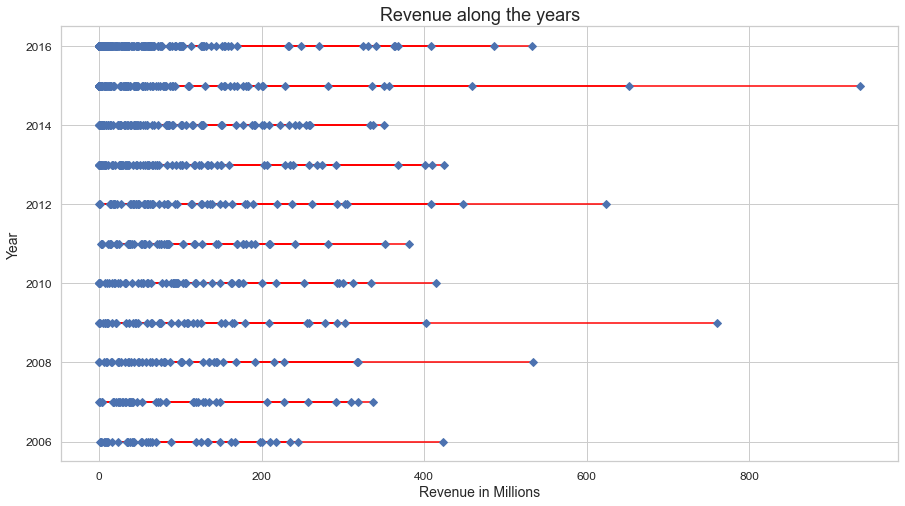

In [177]:
plt.figure(figsize=(15,8))

plt.hlines(data['Year'], xmin=0, xmax=data['Revenue (Millions)'], color='red')
plt.plot(data['Revenue (Millions)'],data['Year'] , "D")

plt.xlabel(xlabel='Revenue in Millions', fontsize=14)
plt.ylabel(ylabel='Year', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title(label='Revenue along the years', fontsize=18)
plt.grid(b=True)

plt.show()

**Observation:**

- The Revenue per year may be fluctuating, but the answer is obvious, **2015** can be called as the best year for the industry in terms of Revenue generated.

**Q** Which Director has more movie releases in the given timeframe ?

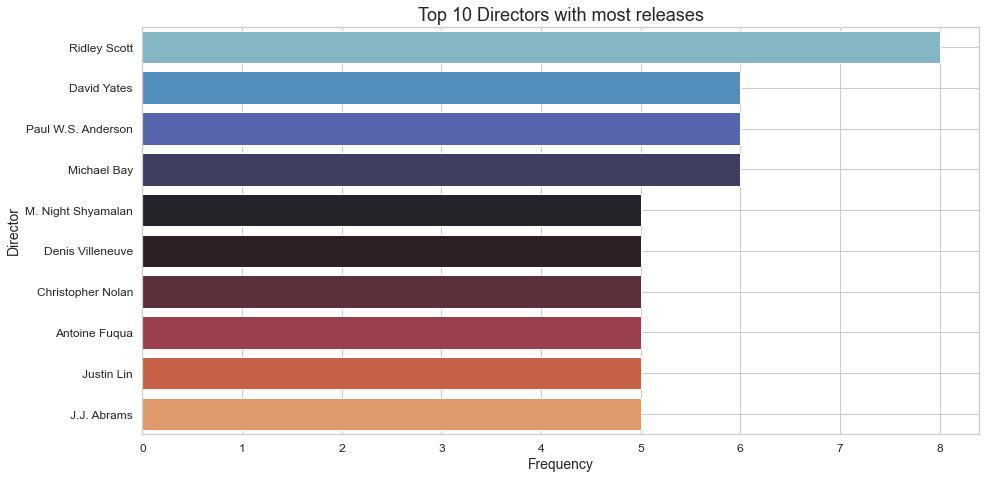

In [294]:
Director_count = Counter(data['Director']).most_common(10)

Director_idx = [Director[0] for Director in Director_count]
Director_val = [Director[1] for Director in Director_count]

fig = plt.figure(figsize=[15, 7.5])

sns.barplot(x=Director_val, y=Director_idx, palette = "icefire")

plt.title(label='Top 10 Directors with most releases', size=18)
plt.xlabel(xlabel='Frequency', size=14)
plt.ylabel(ylabel='Director', size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.grid(b=True)

plt.show()

**Q** Which Genre movies have most releases?

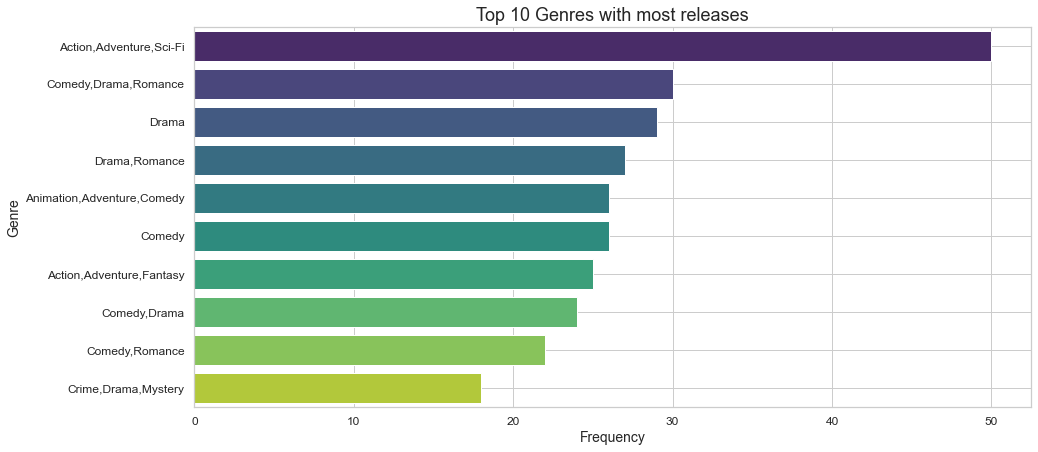

In [292]:
Genre_count = Counter(data['Genre']).most_common(10)

Genre_name = [Genre[0] for Genre in Genre_count]
Genre_val = [Genre[1] for Genre in Genre_count]

fig = plt.figure(figsize=[15, 7])

sns.barplot(x=Genre_val, y=Genre_name, palette = "viridis")

plt.title(label='Top 10 Genres with most releases', size=18)
plt.xlabel(xlabel='Frequency', size=14)
plt.ylabel(ylabel='Genre', size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.grid(b=True)

plt.show()

**Observation:**

- We can make a point that **Action**, **Adventure** and **Sci-Fi** are the top genres.

**Q** What is the Average duration of a movie?

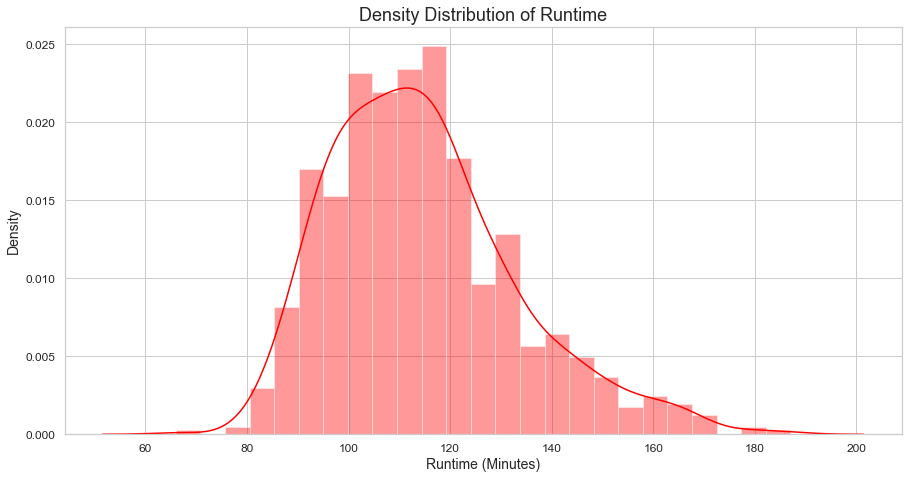

In [194]:
fig = plt.figure(figsize=(15, 7.5))

sns.distplot(a=data['Runtime (Minutes)'], kde=True, color = "Red")

plt.title(label='Density Distribution of Runtime', size=18)
plt.xlabel(xlabel='Runtime (Minutes)', size=14)
plt.ylabel(ylabel='Density', size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.grid(b=True)

plt.show()

**Observation:**

- Well, It is found to be that most movies are having a duration of about **100** to **120** minutes or approx **1hr 40 min** to **2 hrs**.

 **Q** What is the average revenue generated per year per movie ?</h4>

In [181]:
avg_revenue = pd.DataFrame(data.groupby('Year')['Revenue (Millions)'].mean())
avg_revenue.columns = ['Average Revenue']
avg_revenue.head(11)

,Average Revenue
Year,
2006,87.25561
2007,93.07409
2008,97.52542
2009,115.74200
2010,105.08158
2011,93.70333
2012,110.10306
2013,88.08464
2014,85.43366


In [182]:
avg_revenue.describe()

,Average Revenue
count,11.00000
mean,92.02683
std,16.22530
min,55.56611
25%,86.34463
50%,93.07409
75%,101.30350
max,115.74200


**Observations:**

- An average of **92 million** is generated per year per movie.

- More than couple of years generated an average revenue per movie of **over 100 million**.

 **Q** How does the runtime of a movie related to the rating recieved ?

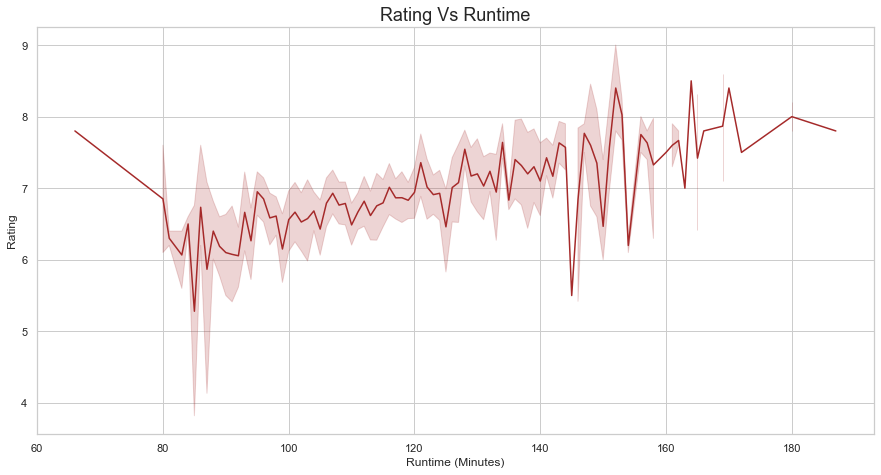

In [275]:
fig = plt.figure(figsize=(15, 7.5))

sns.lineplot(data=data, x="Runtime (Minutes)", y="Rating", color = 'brown')
plt.title(label='Rating Vs Runtime', size=18)

plt.show()

**Observation:**

- Well, we can make a statement that most movies with **Rating greater than 7** are the ones with **Duration** greater than **120 min** or approx **2 hrs**.

 **Q** How does the runtime of a movie related to the movie's box office performance (Revenue) ?

<Figure size 1080x576 with 0 Axes>

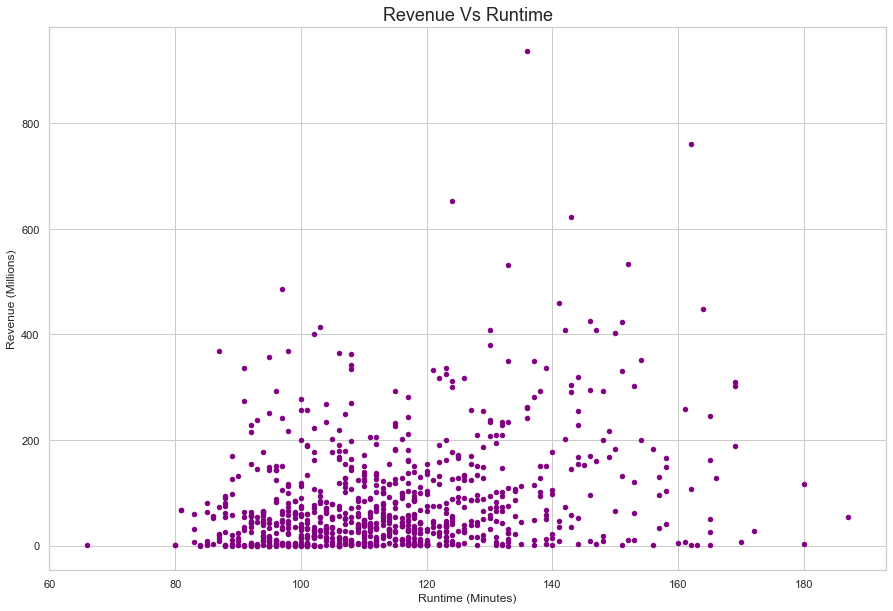

In [196]:
fig = plt.figure(figsize=(15, 8))

data.plot.scatter(x= 'Runtime (Minutes)', y= 'Revenue (Millions)', color ='Purple', figsize= [15,10])
plt.title(label='Revenue Vs Runtime', size=18)

plt.show()

**Observation:**

- We can make a statement that most movies with **Revenue greater than 400 million dollars** are the ones with **Duration** greater than **120 min** or approx **2 hrs**.

 **Q** Does Metascore matters in making the most revenue, if so what impact it has on a movie's box office performance (Revenue) ?

<Figure size 1080x576 with 0 Axes>

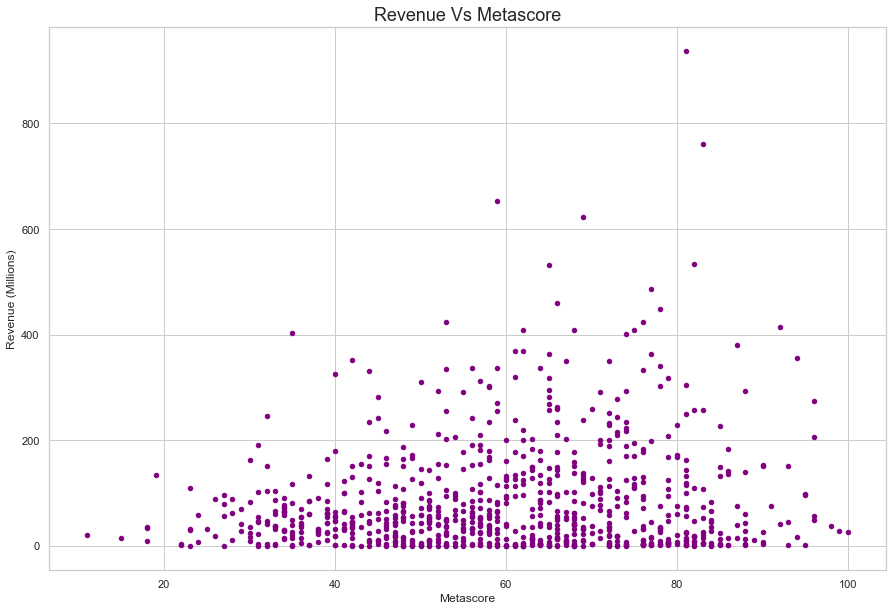

In [203]:
fig = plt.figure(figsize=(15, 8))

data.plot.scatter(x= 'Metascore', y= 'Revenue (Millions)', color ='Purple', figsize= [15,10])
plt.title(label='Revenue Vs Metascore', size=18)

plt.show()

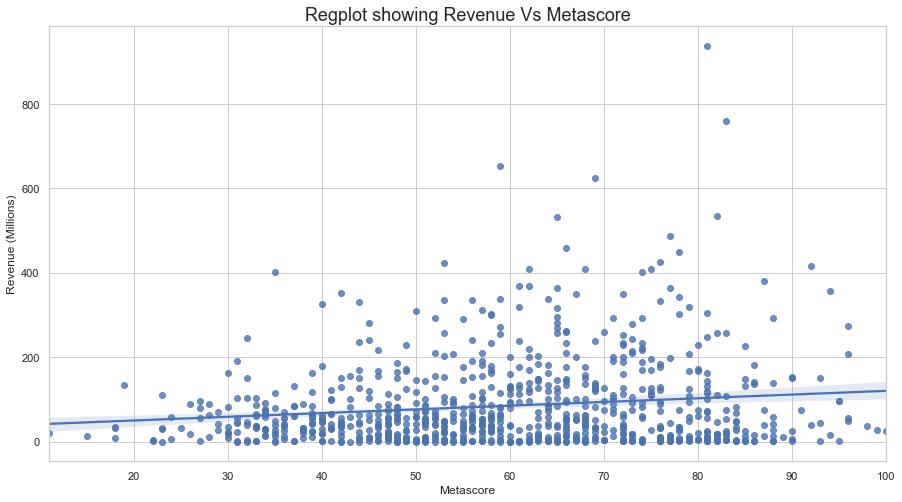

In [209]:
fig = plt.figure(figsize=(15, 8))

ax = sns.regplot(x= 'Metascore', y= 'Revenue (Millions)', data=data)
plt.title(label='Regplot showing Revenue Vs Metascore', size=18)

plt.show()

**Observation:**

- Yes, it does. Most movies with **Revenue greater than 400 million dollars** are the ones with **Metascore** greater than **60** out of **100**.

 **Q** What are the Ratings recieved by the Movies over the years ?

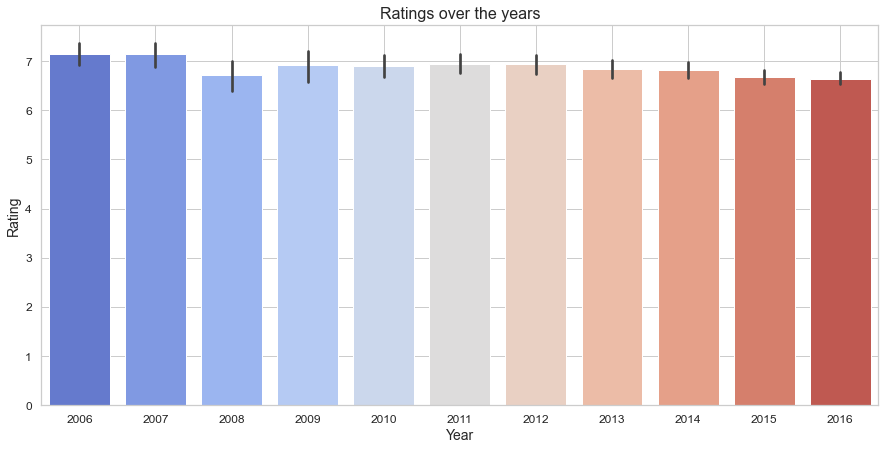

In [201]:
plt.figure(figsize=(15,7))

sns.barplot(data=data, x='Year', y='Rating', palette = 'coolwarm')

plt.xlabel(xlabel='Year', fontsize=14)
plt.ylabel(ylabel='Rating', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title(label='Ratings over the years', fontsize=16)
plt.grid(b=True)

plt.show()

**Q** What is the trend of Votes recieved along the years ?

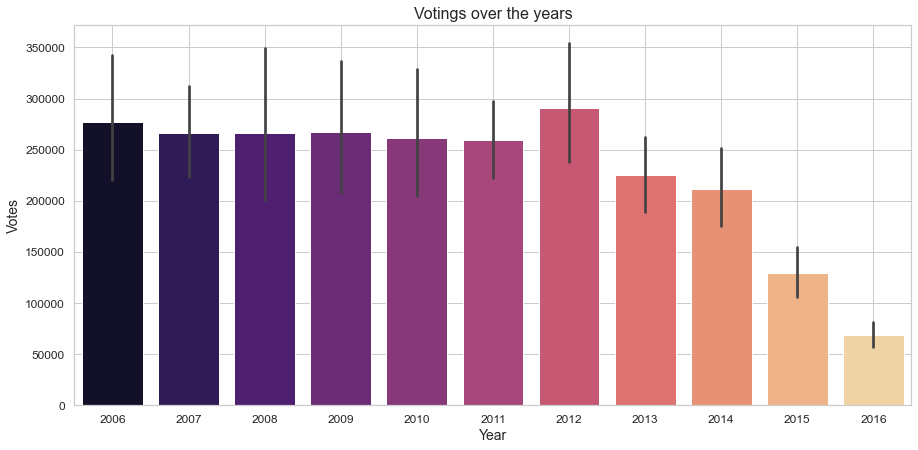

In [218]:
plt.figure(figsize=(15,7))

# Plot a barplot for month vs revenue for the UK
sns.barplot(data=data, x='Year', y='Votes', palette = 'magma')

# Adding some cosmetics
plt.xlabel(xlabel='Year', fontsize=14)
plt.ylabel(ylabel='Votes', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title(label='Votings over the years', fontsize=16)
plt.grid(b=True)

# Display the plot
plt.show()

**Q** How are Revenue and Votes of a movie related ?

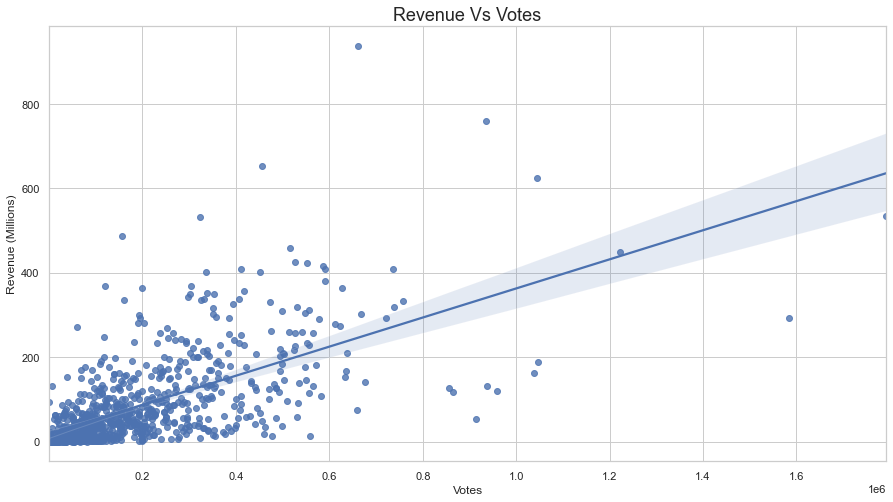

In [284]:
plt.figure(figsize=(15,8))

ax = sns.regplot(x="Votes", y="Revenue (Millions)", data=data)
plt.title(label= 'Revenue Vs Votes', size=18)

plt.show()

**Observation:**

- Most movies with **Revenue greater than 400 million dollars** are the ones with **Votes** greater than **400,000** 

**Q** How are Ratings and Metascore of a movie related ?

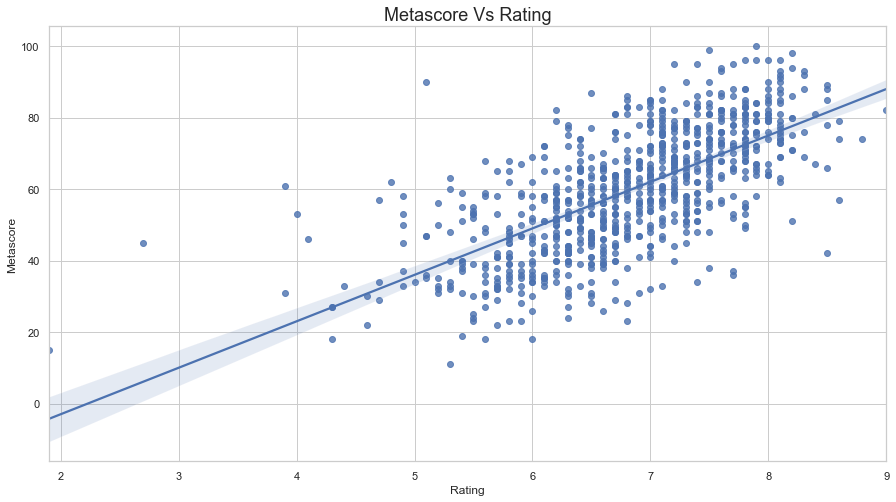

In [212]:
plt.figure(figsize=(15,8))

ax = sns.regplot(x="Rating", y="Metascore", data=data)
plt.title(label= 'Metascore Vs Rating', size=18)

plt.show()

**Observation:**

- It is clear that th **Metascore** increases with the **Rating** and are **directly proportional** to each other.
- We can have a say that **Critics** are having an influence over Audience's rating.

 **Q** Does Rating matters in making the most revenue, if so what impact it has on a movie's box office performance (Revenue) ?

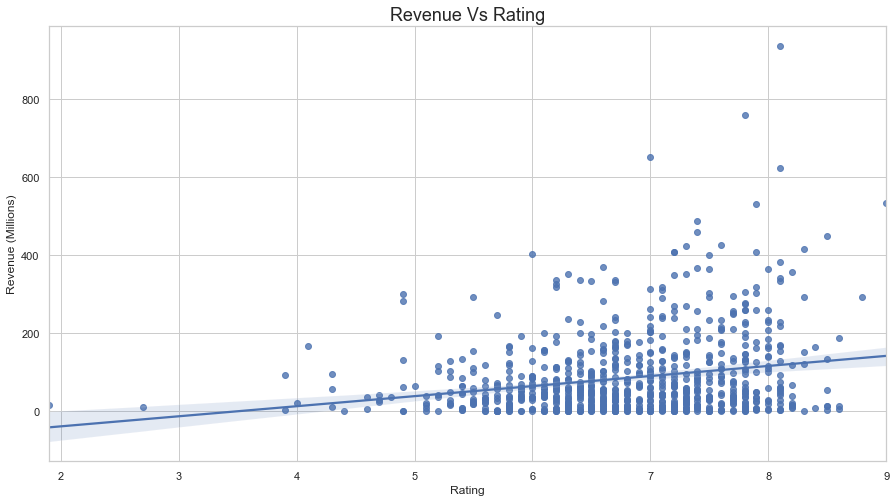

In [276]:
plt.figure(figsize=(15,8))

ax = sns.regplot(x="Rating", y="Revenue (Millions)", data=data)
plt.title(label= 'Revenue Vs Rating', size=18)

plt.show()

**Observation:**

- Yes, it does. Most movies with **Revenue greater than 400 million dollars** are the ones with **Rating** greater than **7** out of **10**.

**Q**  We have observed that the year 2015 had generated highest Revenue. Let's have a look at what Genre movies released most in 2015 ?

In [251]:
Genre_Year15 = data.loc[data["Year"] == 2015, 'Genre']
Genre_Year15.value_counts()


Action,Adventure,Sci-Fi       8
Comedy,Drama                  6
Drama                         5
Comedy,Drama,Romance          4
Drama,Romance                 4
Action,Crime,Drama            3
Crime,Drama,Mystery           3
Action,Adventure,Comedy       3
Biography,Drama,History       3
Comedy                        3
Action,Adventure,Drama        2
Comedy,Crime,Drama            2
Animation,Adventure,Comedy    2
Biography,Crime,Drama         2
Drama,Fantasy,Horror          2
Action,Adventure,Thriller     2
Mystery,Thriller              2
Action,Adventure,Fantasy      2
Drama,Sport                   2
Action,Comedy,Family          1
Action,Comedy,Horror          1
Comedy,Drama,Music            1
Crime,Drama                   1
Drama,Thriller                1
Action,Adventure,Biography    1
Biography,Drama,Romance       1
Comedy,Horror,Thriller        1
Drama,Music,Romance           1
Adventure,Sci-Fi,Thriller     1
Action,Comedy,Romance         1
Adventure,Family,Fantasy      1
Animatio

In [252]:
Genre_Year15.shape

(109,)

**Observation:**

- **109** movies have been released in the year **2015**. 
- Astoundingly **19** movies of the total 109 movies released are of the **Top 5** Genres.


---
# **9. Summarization**
---

<a name = Section91></a>
### **9.1 Conclusion**

- An average of **84** movies are being released every year.

- **2016** produced most no. of movies **198** and **2006** produced least number of movies **41**.

- **Metascore** and **Rating** are directly proportional to each other, which implies that **Critics** are having an influence on **Audience** Rating.

- The average Rating per movie is **6.8/10**.

- The average Revenue generated per movie is **92 million dollars**.

- The average Duration of a movie ranges from **1 hr 40 min** to **2 hrs**.

- Most profitable movies are the ones with high **Metascore** and **Rating** .



<a name = Section92></a>
### **9.2 Actionable Insights**

- By analysing the data in this way, we can uncover **factors** that contribute more to a movie's box office performance.

- **Duration**, **Genre** and **Metascore** should be the **primary concerns** for film makers.

- **Revenue** and **Rating** are directly proportional to each other, which implies that Revenue increases with higher Rating.
- Again audience **Rating** is proved to be influenced by **Metascore** which is aggregated from the reviews of the critics all over the world.
- **Action**, **Adventure**, **Sci-Fi** & **Drama** are found to be the top Genres to consider for generating more revenue.

***
All in all, in order to higher revenue out of a movie, the film makers need to consider about the following:
- To fix the **Duration** of the movie in the range **1 hr 40 min** to **2 hrs**
- Chose the top performing **Genres**
- Achieving high **Metascore** from the Critics.
- Audience **Rating** higher than **7/10**
- **Votes** do play a role in making the movie popular, which inturn helps in generating more Revenue. - **More Promotions** , better Revenue.
